### Logistic regression (binary classification) - vectorial algorithm

In [1]:
import numpy as np
import pandas as pd
from show import show

In [2]:
data = pd.read_csv('test.csv', header=None)
data = np.array(data)
print(data)

X = np.array(data[:,[0,1]])
y = np.array(data[:,[2]])

print("X",X)
print("y",y)

[[0.28488 0.52142 1.     ]
 [0.27633 0.21264 1.     ]
 [0.39748 0.31902 1.     ]
 [0.5533  1.      0.     ]
 [0.44274 0.59205 0.     ]
 [0.85176 0.6612  0.     ]
 [0.60436 0.86605 0.     ]]
X [[0.28488 0.52142]
 [0.27633 0.21264]
 [0.39748 0.31902]
 [0.5533  1.     ]
 [0.44274 0.59205]
 [0.85176 0.6612 ]
 [0.60436 0.86605]]
y [[1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]]


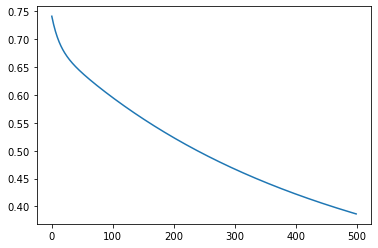

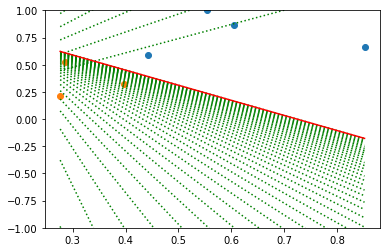

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

w = np.array([[-1,1]])
b = np.array([[0]])

alpha = 0.1
epochs = 500

wHistory = []
lossHistory = []

def train():
    global w,b
    
    z = X @ w.T + b
    #z = X.dot(w.T) + b
    y_hat = sigmoid(z)
    loss_points = (-1)*(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))
    loss = np.mean(loss_points)

    #explicit gradients compute formula
    dw_points = (y_hat - y) * X
    db_points = (y_hat - y)
    dw = np.mean(dw_points,axis=0)
    db = np.mean(db_points,axis=0)

    #adjust weights
    w = w - alpha * dw
    b = b - alpha * db

    wHistory.append([w[0][0],w[0][1],b[0][0]])
    lossHistory.append(loss) 
    
for e in range(epochs):
    train()     
    
show(data, epochs, wHistory, lossHistory,[-1,1])    